In [1]:
import numpy as np
import pandas as pd
from luwiji.recommendation_system import illustration

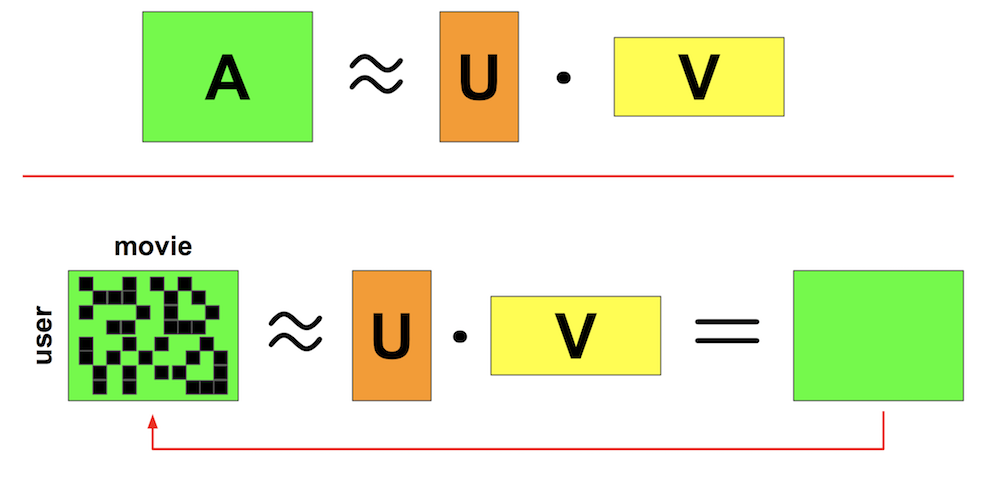

In [3]:
illustration.svd

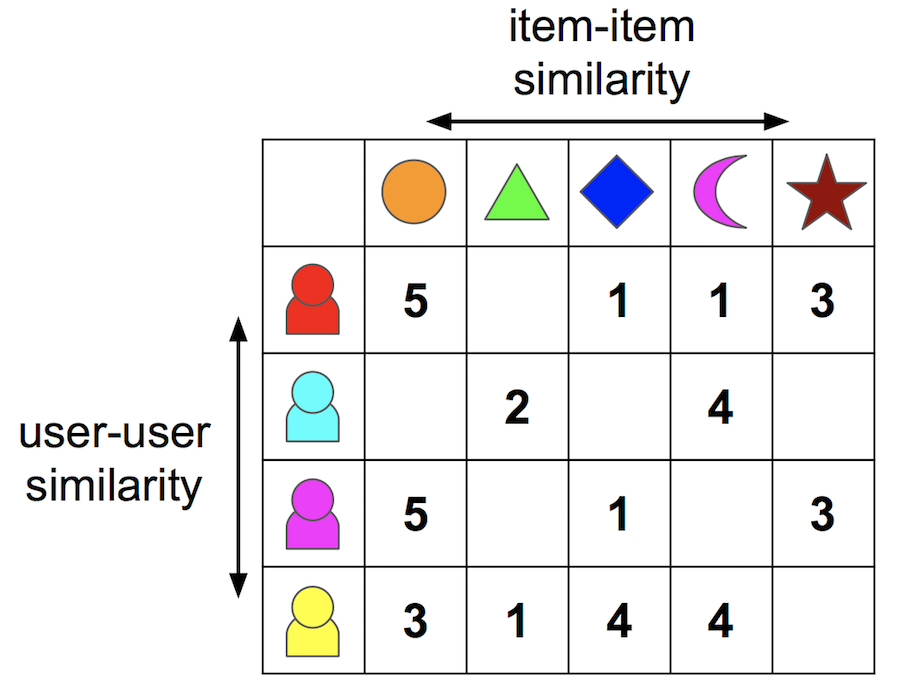

In [4]:
illustration.collaborative

# Import User Rating

In [5]:
df = pd.read_csv('data/collaborative_filtering.csv')
df.head()

,userId,movie,rating
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,1,James and the Giant Peach (1996),3
2,1,My Fair Lady (1964),3
3,1,Erin Brockovich (2000),4
4,1,"Bug's Life, A (1998)",5


# Training

In [9]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [11]:
data = Dataset.load_from_df(df, Reader())
trainset = data.build_full_trainset()

In [12]:
model = SVD()
model.fit(trainset)

In [15]:
model.predict(1, "My Fair Lady (1964)")

Prediction(uid=1, iid='My Fair Lady (1964)', r_ui=None, est=4.2630887320475255, details={'was_impossible': False})

# Prediksi Rating untuk film yang belum ditonton

In [16]:
user_id = 1

### All Movies

In [17]:
all_movies = df.movie.unique()
all_movies

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)', ...,
       'White Boys (1999)', 'One Little Indian (1973)',
       'Five Wives, Three Secretaries and Me (1998)'], dtype=object)

#### yang sudah ditonton user 1

In [19]:
watched = df[df.userId == 1].movie
watched.head()

0    One Flew Over the Cuckoo's Nest (1975)
1          James and the Giant Peach (1996)
2                       My Fair Lady (1964)
3                    Erin Brockovich (2000)
4                      Bug's Life, A (1998)
Name: movie, dtype: object

#### Yang belum ditonton user 1

In [22]:
not_watched = [movie for movie in all_movies if movie not in watched]
not_watched

["One Flew Over the Cuckoo's Nest (1975)",
 'James and the Giant Peach (1996)',
 'My Fair Lady (1964)',
 'Erin Brockovich (2000)',
 "Bug's Life, A (1998)",
 'Princess Bride, The (1987)',
 'Ben-Hur (1959)',
 'Christmas Story, A (1983)',
 'Snow White and the Seven Dwarfs (1937)',
 'Wizard of Oz, The (1939)',
 'Beauty and the Beast (1991)',
 'Gigi (1958)',
 'Miracle on 34th Street (1947)',
 "Ferris Bueller's Day Off (1986)",
 'Sound of Music, The (1965)',
 'Airplane! (1980)',
 'Tarzan (1999)',
 'Bambi (1942)',
 'Awakenings (1990)',
 'Big (1988)',
 'Pleasantville (1998)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)',
 'Back to the Future (1985)',
 "Schindler's List (1993)",
 'Meet Joe Black (1998)',
 'Pocahontas (1995)',
 'E.T. the Extra-Terrestrial (1982)',
 'Titanic (1997)',
 'Ponette (1996)',
 'Close Shave, A (1995)',
 'Antz (1998)',
 'Girl, Interrupted (1999)',
 'Hercules (1997)',
 'Aladdin (1992)',
 'Mulan (1998)',
 'Hunchback of Notre Dame, The (1996)',
 'Last Days of Di

# Prediksi rating yang belum ditonton

In [23]:
score = [model.predict(user_id, movie).est for movie in not_watched]
score

[4.570832569777822,
 3.136104853978284,
 4.2630887320475255,
 4.21884871147422,
 4.31463181976505,
 4.289000845880607,
 4.300521729782493,
 4.366080514077607,
 4.193438604851425,
 4.454797397435513,
 4.217599856178627,
 4.137691684839385,
 4.32464167660215,
 4.197362627340762,
 4.552732615323108,
 3.9267405085041203,
 3.66099624684534,
 4.2506004729617795,
 4.104851520045631,
 4.321395854189507,
 3.670909030594928,
 4.46620001635102,
 4.31511080531569,
 4.801184189651592,
 3.624031171073049,
 3.648983153837525,
 4.357126430163602,
 4.0951740806564825,
 4.137054216200413,
 4.3763269973415,
 3.8399350333341937,
 3.8950918067926006,
 3.624110067102183,
 4.102529401651403,
 4.25849161093767,
 3.6888201215476997,
 3.537972610893015,
 4.3734315735762745,
 4.74519744994074,
 4.4787450438035,
 4.697788740317789,
 4.3616417807678936,
 4.191146100767767,
 3.9332634207485744,
 4.2778085924214455,
 4.530922153301836,
 4.2689511190460605,
 4.557172326638446,
 4.643447908917361,
 4.0325747526668145,

# ML Enginering: Sum them all up

In [27]:
class RecommenderSystem:
    def __init__(self, data):
        self.df = pd.read_csv(data)
        self.all_movies = self.df.movie.unique()
        self.model = None
    def fit(self):
        data = Dataset.load_from_df(self.df, Reader())
        trainset = data.build_full_trainset()
        self.model = SVD()
        self.model.fit(trainset)
    def recommend(self, user_id, topk=10):
        watched = self.df[self.df.userId == user_id].movie
        not_watched = [movie for movie in self.all_movies if movie not in watched]
        score = [self.model.predict(user_id, movie).est for movie in not_watched]
        result = pd.DataFrame({'movie': not_watched, 'pred_rating' : score})
        result.sort_values('pred_rating', ascending=False, inplace=True)
        return result.head(topk)


In [29]:
recsys = RecommenderSystem('data/collaborative_filtering.csv')
recsys.fit()

In [30]:
recsys.recommend(1)

,movie,pred_rating
23,Schindler's List (1993),5.000000
167,"Shawshank Redemption, The (1994)",4.957545
2626,"World of Apu, The (Apur Sansar) (1959)",4.871070
669,"Godfather, The (1972)",4.843731
693,It's a Wonderful Life (1946),4.833519
6,Ben-Hur (1959),4.808748
128,"Silence of the Lambs, The (1991)",4.791296
719,"African Queen, The (1951)",4.783122
48,Saving Private Ryan (1998),4.776851
718,Lawrence of Arabia (1962),4.768037
